# Structurer un workflow pour le déployer en production

<center> <img src="workflow.png" alt="image workflow"> </center>

In [198]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from scipy.stats import levene

In [145]:
data = sns.load_dataset('tips')

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [147]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [148]:
y = data['tip']

In [149]:
X = data.drop(columns=['tip'])

In [150]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [151]:
lg = LinearRegression()

# Iteration 1 - categoric features (get_dummies)

In [152]:
X_train

,total_bill,sex,smoker,day,time,size
213,13.27,Female,Yes,Sat,Dinner,2
63,18.29,Male,Yes,Sat,Dinner,4
39,31.27,Male,No,Sat,Dinner,3
45,18.29,Male,No,Sun,Dinner,2
36,16.31,Male,No,Sat,Dinner,3
...,...,...,...,...,...,...
216,28.15,Male,Yes,Sat,Dinner,5
211,25.89,Male,Yes,Sat,Dinner,4
237,32.83,Male,Yes,Sat,Dinner,2
64,17.59,Male,No,Sat,Dinner,3


In [153]:
y_train

213    2.50
63     3.76
39     5.00
45     3.00
36     2.00
       ... 
216    3.00
211    5.16
237    1.17
64     2.64
147    1.63
Name: tip, Length: 170, dtype: float64

In [154]:
#lg.fit(X_train, y_train)

In [155]:
X_train.sample(2)

,total_bill,sex,smoker,day,time,size
183,23.17,Male,Yes,Sun,Dinner,4
223,15.98,Female,No,Fri,Lunch,3


In [156]:
X_train_dummies = pd.get_dummies(X_train)

In [157]:
X_train_dummies.sample(2)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
226,10.09,2,0,1,1,0,0,1,0,0,1,0
121,13.42,2,0,1,0,1,1,0,0,0,1,0


In [158]:
lg_train = lg.fit(X_train_dummies, y_train)

In [159]:
X_test_dummies = pd.get_dummies(X_test)

In [160]:
lg_train.score(X_test_dummies, y_test)

0.2917328865733484

# Iteration 2 - categoric + numeric features

In [161]:
X_train_2,X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3)

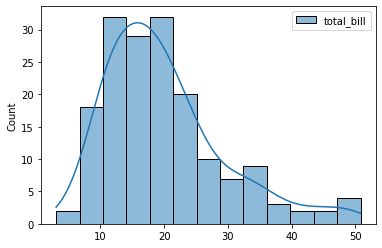

In [162]:
sns.histplot(data=X_train_2[["total_bill"]], kde=True);

<AxesSubplot:ylabel='Count'>

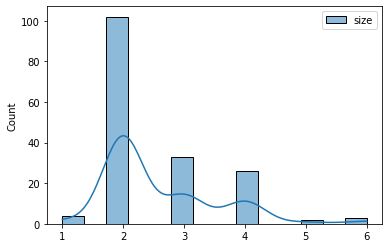

In [163]:
sns.histplot(data=X_train_2[["size"]], kde=True);

## Scaler

### Numerical features

In [164]:
scaler = MinMaxScaler()
scaler.fit(X_train_2[["size","total_bill"]])
X_train_2_scaled = scaler.transform(X_train_2[["size","total_bill"]])

In [165]:
X_train_2_scaled_df = pd.DataFrame(X_train_2_scaled)
X_train_2_scaled_df.rename(columns={0: "size_scaled", 1: "total_bill_scaled"})

,size_scaled,total_bill_scaled
0,0.6,0.318810
1,0.6,0.567030
2,0.2,0.147047
3,0.0,0.146628
4,0.4,0.686217
...,...,...
165,0.2,0.152074
166,0.2,0.210725
167,0.2,0.199623
168,0.2,0.232090


In [166]:
X_train_2_scaled_df

,0,1
0,0.6,0.318810
1,0.6,0.567030
2,0.2,0.147047
3,0.0,0.146628
4,0.4,0.686217
...,...,...
165,0.2,0.152074
166,0.2,0.210725
167,0.2,0.199623
168,0.2,0.232090


### Categorical Features

In [167]:
X_train_2[["sex","smoker","day","time"]].nunique()

sex       2
smoker    2
day       4
time      2
dtype: int64

In [168]:
ohe = OneHotEncoder()

In [169]:
ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

<170x10 sparse matrix of type '<class 'numpy.float64'>'
	with 680 stored elements in Compressed Sparse Row format>

In [170]:
X_train_2_ohe = ohe.fit_transform(X_train_2[["sex","smoker","day","time"]])

In [171]:
X_train_2_ohe_df = pd.DataFrame.sparse.from_spmatrix(X_train_2_ohe)

In [172]:
X_train_2_ohe_df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [173]:
X_train_2_prep_df = pd.concat([X_train_2_ohe_df, X_train_2_scaled_df], axis=1)

In [174]:
X_train_2_prep_df.head(3)

,0,1,2,3,4,5,6,7,8,9,0,1
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.6,0.318810
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.6,0.567030
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2,0.147047


In [175]:
lg_2 = LinearRegression()

In [176]:
lg_2.fit(X_train_2_prep_df,y_train_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [177]:
# ==> Il faut scaler le X_test_2_prep_df. Avec la même methodologie que le X_train_2, sans faire de dataLeakeage. 
# ==> Créer les methodes appropriées pour réutiliser la logique.

def scaled(X_train, X_test, scaler):
    columns = X_test._get_numeric_data().columns.values.tolist()
    scaler.fit(X_train[columns])
    df = pd.DataFrame(scaler.transform(X_test[columns]))
    return df.rename(columns={i:f'{columns[i]}_scaled' for i in range(len(columns))})

def oheed(X_train, X_test):
    columns = list(set(X.columns)-set(X_test._get_numeric_data().columns))
    ohe.fit(X_train[columns])
    return pd.DataFrame.sparse.from_spmatrix(ohe.transform(X_test[columns]))

def preped(X_train, X_test, scaler): 
    return pd.concat([oheed(X_train, X_test), scaled(X_train, X_test, scaler)], axis=1)

In [178]:
X_train_2_prep_df = preped(X_train_2, X_train_2, MinMaxScaler())
X_test_2_prep_df = preped(X_train_2, X_test_2, MinMaxScaler())

X_test_2_prep_df.head(3)

,0,1,2,3,4,5,6,7,8,9,total_bill_scaled,size_scaled
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.614370,0.6
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.573733,0.8
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.155844,0.2


In [189]:
lg_2.fit(X_train_2_prep_df,y_train_2)
lg_2.score(X_test_2_prep_df, y_test_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.2897963880564942

In [190]:
y_pred = lg_2.predict(X_test_2_prep_df)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


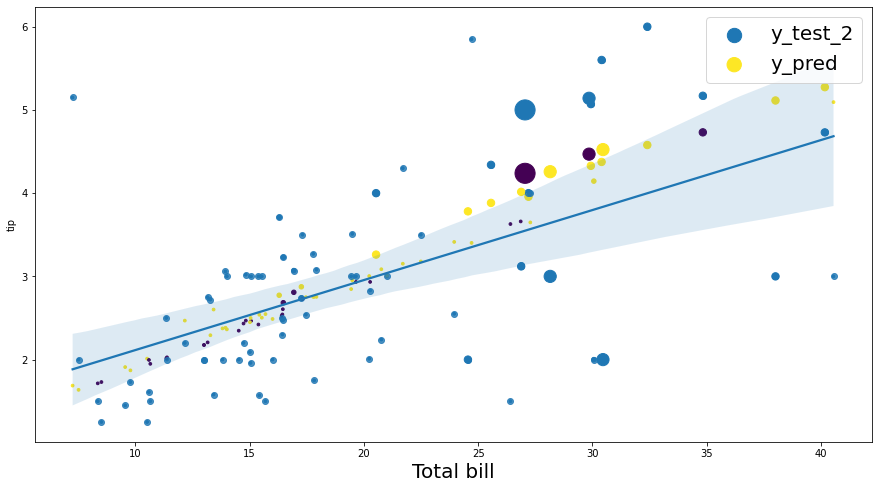

In [191]:
# Afficher un nuage de point qui révéle les informations suivantes : y_true vs y_predict en fonction de total_bill

plt.figure(figsize=(15, 8))
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test_2', s=np.exp(X_test_2['size']))
plt.scatter(X_test_2['total_bill'], y_pred, label='y_pred', s=np.exp(X_test_2['size']), c=pd.get_dummies(X_test_2['sex'])['Male'])
sns.regplot(X_test_2['total_bill'], y_test_2)
plt.xlabel('Total bill', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [192]:
# Re-testester avec un StandardScaler => https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

X_train_2_prep_df_std = preped(X_train_2, X_train_2, StandardScaler())
X_test_2_prep_df_std = preped(X_train_2, X_test_2, StandardScaler())

lg_2.fit(X_train_2_prep_df_std, y_train_2)
lg_2.score(X_test_2_prep_df_std, y_test_2)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.29340365588983786

In [193]:
y_pred_std = lg_2.predict(X_test_2_prep_df_std)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


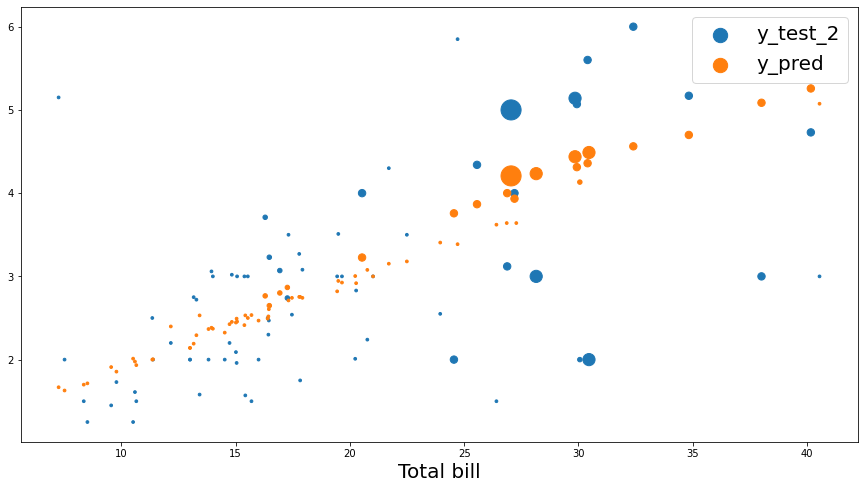

In [194]:
plt.figure(figsize=(15, 8))
plt.scatter(X_test_2['total_bill'], y_test_2, label='y_test_2', s=np.exp(X_test_2['size']))
plt.scatter(X_test_2['total_bill'], y_pred_std, label='y_pred', s=np.exp(X_test_2['size']))
plt.xlabel('Total bill', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [279]:
# Afficher l'hétéroscédasticité ou l'homoscédasticité des erreurs.

n = 3
y_tests = []
for i in range(n): 
    yt = y.sample(int(0.3*len(y)))
    y_tests.append(yt)

levene(*y_tests)

LeveneResult(statistic=0.5480972657491568, pvalue=0.5788504276605728)

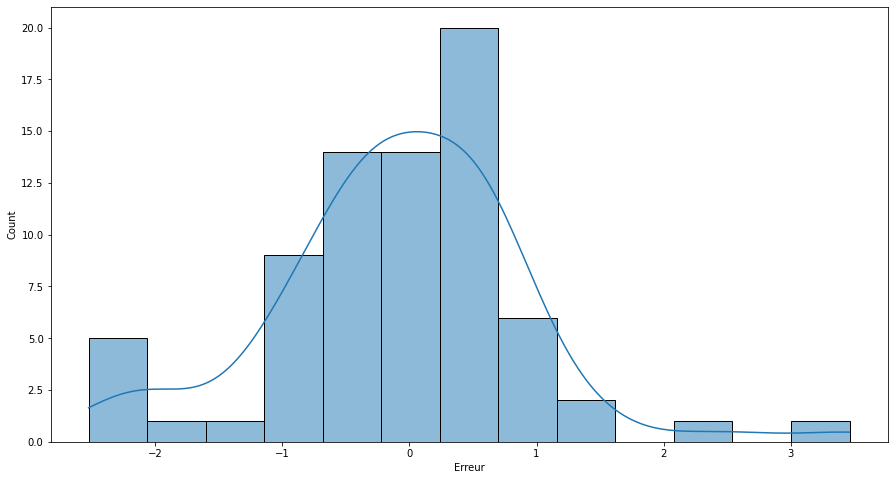

In [283]:
# Afficher la distribution des erreurs. (Normalité des erreurs).

y_error = y_test_2-y_pred

plt.figure(figsize=(15,8))
sns.histplot(y_error, kde=True)
plt.xlabel('Erreur')
plt.show()

In [228]:
# Créer un package à l'aide https://pypi.org/project/setuptools/